In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Data from paper Leak Proof PDBBind: A Reorganized Dataset of Protein-Ligand Complexes for More Generalizable Binding Affinity Prediction https://pubmed.ncbi.nlm.nih.gov/37645037/

In [2]:
df=pd.read_csv('data/leaky_pdb.csv')
df

,Unnamed: 0,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
0,6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,2019-11-27,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False
1,3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,2010-01-05,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False
2,4b7r,hydrolase,CCC(CC)O[C@@H]1C[C@H](C(=O)[O-])C[C@H]([NH3+])...,refined,VKLAGNSSLCPVSGWAIYSKDNSVRIGSKGDVFVIREPFISCSPLE...,1.90,2012-10-03,hydrolase,NaN,True,True,True,False,Ki=0.23nM,9.64,False
3,3qfd,immune system,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](C)NC(=O)[C@...,refined,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,1.68,2011-09-28,other,train,False,False,False,False,Kd=68uM,4.17,False
4,3fvn,membrane protein,[NH3+][C@@H](C[C@]1(C(=O)[O-])C[C@H]2OCC[C@@H]...,refined,ANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNIL...,1.50,2010-01-19,membrane,val,True,True,True,False,Ki=169nM,6.77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19438,6npt,transferase,CC(C)(C)c1ccc(C(=O)Nc2cc(-c3ccccc3)nn2-c2ccccc...,general,IENCVHHIKRRDIVLKWELGEGAFGKVFLAECHNLLPEQDKMLVAV...,2.19,2019-05-22,transferase,test,True,False,False,False,IC50=68.3nM,7.17,False
19439,3pax,transferase,COc1cccc(C(N)=O)c1,general,KSKLAKPIQDLIKMIFDVESMKKAMVEFEIDLQKMPLGKLSKRQIQ...,2.40,1998-05-27,transferase,val,True,False,False,False,IC50=10uM,5.00,False
19440,5ezz,hydrolase/inhibitor,Cc1cc([C@@]2(c3cccc(-c4cncc(Cl)c4)c3)COC(=[NH2...,general,RGSFVEMVDNLRGKSGQGYYVEMTVGSPPQTLNILVDTGSSNFAVG...,2.10,2016-02-24,hydrolase,test,True,False,False,False,IC50=145nM,6.84,False
19441,1hgi,viral protein,CO[C@]1(C(=O)[O-])C[C@H](OC(C)=O)[C@@H](NC(C)=...,general,QDLPGNDNSTATLCLGHHAVPNGTLVKTITDDQIEVTNATELVQSS...,2.70,1994-01-31,viral,train,True,True,False,False,Kd=2.1mM,2.68,False


In [3]:
df.rename(columns={'Unnamed: 0': 'PDB_ID', 'header': 'Protein Family'}, inplace=True)
df.columns

Index(['PDB_ID', 'Protein Family', 'smiles', 'category', 'seq', 'resolution',
       'date', 'type', 'new_split', 'CL1', 'CL2', 'CL3',
       'remove_for_balancing_val', 'kd/ki', 'value', 'covalent'],
      dtype='object')

In [4]:
protein_family_unique_count = df['Protein Family'].nunique()
type_unique_count = df['type'].nunique()
new_split_unique_count = df['new_split'].nunique()
print(f"Unique values in 'Protein family sub categories': {protein_family_unique_count}")
print(f"Unique values in 'Protein family categories': {type_unique_count}")
#print(f"Unique values in 'new_split': {new_split_unique_count}")
type_counts = df.groupby('type').agg({'value': 'count', 'PDB_ID': 'count'})
new_split_counts = df.groupby('new_split').agg({'value': 'count', 'PDB_ID': 'count'})
print("\n Target Type Counts:\n", type_counts)
print("\n Data Split Counts:\n", new_split_counts)


Unique values in 'Protein family sub categories': 780
Unique values in 'Protein family categories': 13

 Target Type Counts:
                   value  PDB_ID
type                           
chaperone           300     300
hydrolase          5733    5733
isomerase           333     333
ligase              470     470
lyase               867     867
membrane            284     284
metal_containing    120     120
other              3589    3589
oxidoreductase      576     576
transcription       992     992
transferase        5291    5291
transport           621     621
viral               267     267

 Data Split Counts:
            value  PDB_ID
new_split               
test        4860    4860
train      11513   11513
val         2422    2422


In [6]:
# Re-load the dataset and re-run the cleaning process since the environment was reset

import pandas as pd


file_path = 'data/leaky_pdb.csv'
data = pd.read_csv(file_path)

# Remove rows that contain 'IC50' in the 'kd/ki' column
cleaned_data = data[~data['kd/ki'].str.contains('IC50', na=False)]

output_path = 'data/leakpdb_clean.csv'
cleaned_data.to_csv(output_path, index=False)

In [7]:
cleaned_data

,Unnamed: 0,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
0,6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,2019-11-27,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False
1,3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,2010-01-05,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False
2,4b7r,hydrolase,CCC(CC)O[C@@H]1C[C@H](C(=O)[O-])C[C@H]([NH3+])...,refined,VKLAGNSSLCPVSGWAIYSKDNSVRIGSKGDVFVIREPFISCSPLE...,1.90,2012-10-03,hydrolase,NaN,True,True,True,False,Ki=0.23nM,9.64,False
3,3qfd,immune system,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](C)NC(=O)[C@...,refined,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,1.68,2011-09-28,other,train,False,False,False,False,Kd=68uM,4.17,False
4,3fvn,membrane protein,[NH3+][C@@H](C[C@]1(C(=O)[O-])C[C@H]2OCC[C@@H]...,refined,ANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNIL...,1.50,2010-01-19,membrane,val,True,True,True,False,Ki=169nM,6.77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,3zn0,oxidoreductase/peptide,C[C@H](NC(=O)[C@H](C)NC(=O)[C@H](Cc1ccccc1)NC(...,general,PSGVEGAAFQSRLPHDRMTSQEAACFPDIISGPQQTQKVFLFIRNR...,2.80,2013-06-12,oxidoreductase,train,False,False,False,False,Ki=10.7uM,4.97,False
19435,3sv6,"viral protein, hydrolase/inhibitor",CCC[C@H](NC(=O)[C@@H]1[C@H]2CCC[C@H]2CN1C(=O)[...,general,GSHMASMKKKGSVVIVGRINLSGDTAYAQQTRGEEGCQETSQTGRD...,1.40,2012-09-05,viral,train,False,False,False,False,Ki=34.4nM,7.46,True
19436,2h2d,hydrolase,CSCC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCCN...,general,MKMKEFLDLLNESRLTVTLTGAGISTPSGIPDFNVFDIDFFYSHPE...,1.70,2006-09-19,hydrolase,train,False,False,False,False,Kd=4.3uM,5.37,False
19441,1hgi,viral protein,CO[C@]1(C(=O)[O-])C[C@H](OC(C)=O)[C@@H](NC(C)=...,general,QDLPGNDNSTATLCLGHHAVPNGTLVKTITDDQIEVTNATELVQSS...,2.70,1994-01-31,viral,train,True,True,False,False,Kd=2.1mM,2.68,False


In [4]:
df['Binding'] = np.where(df['value'] >= 7, 'Binding (pKd >= 7)', 'Non-Binding (pKd < 7)')

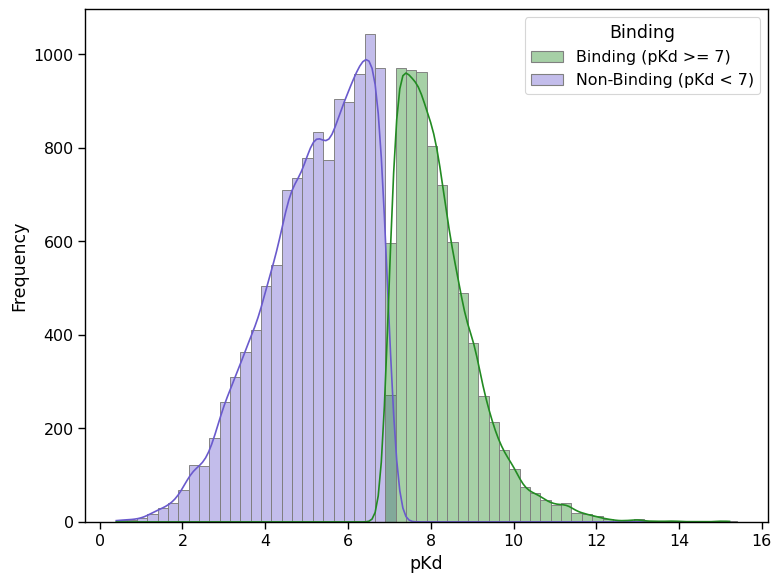

In [5]:

sns.set_context("paper", font_scale=1.3)

palette = {'Binding (pKd >= 7)': '#228B22', 'Non-Binding (pKd < 7)': '#6A5ACD'}

# Set the context and font scale for the plot
plt.figure(figsize=(8, 6))


sns.histplot(
    data=df,
    x='value',
    hue='Binding',
    kde=True,
    palette=palette,  
    binwidth=0.25,  
    alpha=0.4,     
    edgecolor='grey' 
)

# Labels and layout
plt.xlabel('pKd')
plt.ylabel('Frequency')
#plt.title('LeakyPDB')

plt.tight_layout()
plt.savefig('LeakyPDB_kde.png', dpi=500) 
plt.show()

In [9]:
import pandas as pd

class LeakyPDBDataset:
    def __init__(self, csv_file):
        # Load dataset from CSV file
        self.data = pd.read_csv(csv_file)

        # Rename columns for consistency if necessary (if the CSV has different column names)
        self.data = self.data.rename(columns={"smiles": "Drug", "seq": "Target", "value": "Y"})

        print(f"Total of original data: {len(self.data)}")

        # Remove rows where Drug (smiles) is NaN
        self.data = self.data.dropna(subset=["Drug"]).reset_index(drop=True)
        print(f"Total after filtering rows where Drug (smiles) is NaN: {len(self.data)}")

    def get_split(self):
        """Create data splits based on 'new_split' column with additional conditions.
        
        Returns:
            dict: A dictionary of DataFrames for each split ('train', 'valid', 'test').
        """
        # Splitting data based on 'new_split' values with additional conditions
        train = self.data[
            (self.data["new_split"] == "train")
            & self.data["CL1"]
            & ~self.data["covalent"]
        ].reset_index(drop=True)

        valid = self.data[
            (self.data["new_split"] == "val")
            & self.data["CL2"]
            & ~self.data["covalent"]
        ].reset_index(drop=True)

        test = self.data[
            (self.data["new_split"] == "test")
            & self.data["CL2"]
            & ~self.data["covalent"]
        ].reset_index(drop=True)

        print(f"Train size: {len(train)}, Validation size: {len(valid)}, Test size: {len(test)}")

        return {
            "train": train,
            "valid": valid,
            "test": test,
        }

# Load CSV file and create dataset object
csv_file = 'data/leaky_pdb.csv'
dataset = LeakyPDBDataset(csv_file)

# Get train, valid, and test splits based on the new_split column and specified conditions
splits = dataset.get_split()

# Access the splits
train_data = splits['train']
valid_data = splits['valid']
test_data = splits['test']

# Optionally, save the test set (or any other set) to a CSV file
#test_data.to_csv('test_set_leakypdb.csv', index=False)



Total of original data: 19443
Total after filtering rows where Drug (smiles) is NaN: 19121
Train size: 7393, Validation size: 958, Test size: 2171


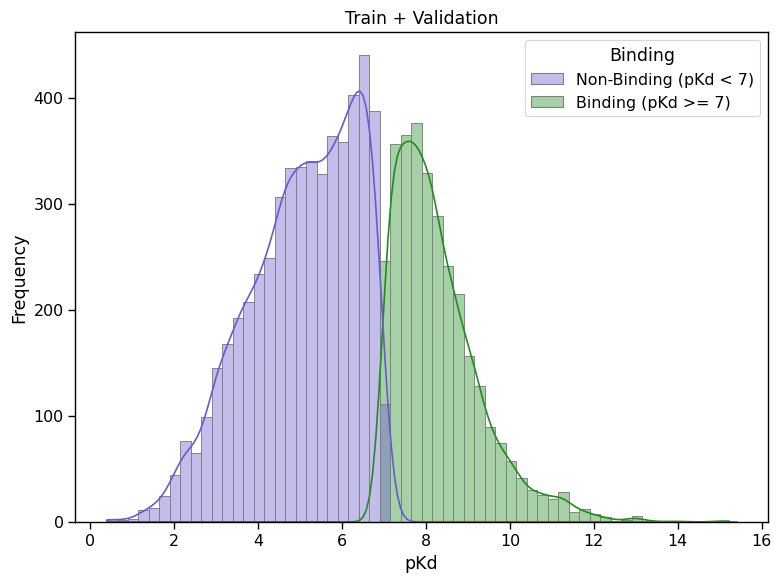

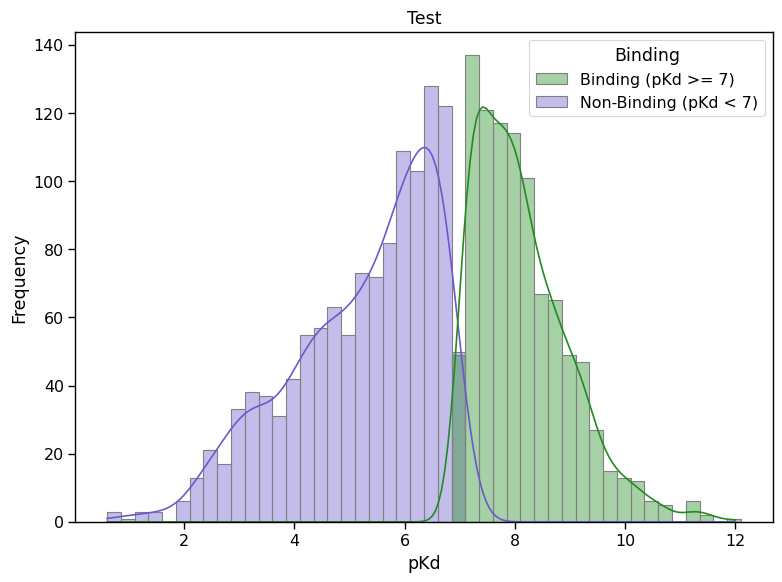

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming splits have been done
train_data['split'] = 'train'
valid_data['split'] = 'valid'
test_data['split'] = 'test'

# Combine train and valid datasets
train_valid_data = pd.concat([train_data, valid_data])

# Define Binding categories for training/validation
train_valid_data['Binding'] = np.where(train_valid_data['Y'] >= 7, 'Binding (pKd >= 7)', 'Non-Binding (pKd < 7)')
test_data['Binding'] = np.where(test_data['Y'] >= 7, 'Binding (pKd >= 7)', 'Non-Binding (pKd < 7)')

# Define color palette
palette = {'Binding (pKd >= 7)': '#228B22', 'Non-Binding (pKd < 7)': '#6A5ACD'}

# Set context and font scale
sns.set_context("paper", font_scale=1.3)

# Plot train and validation together
plt.figure(figsize=(8, 6))
sns.histplot(
    data=train_valid_data,
    x='Y',  # assuming 'Y' is your pKd column
    hue='Binding',
    kde=True,
    palette=palette,  
    binwidth=0.25,  
    alpha=0.4,     
    edgecolor='grey'
)
plt.xlabel('pKd')
plt.ylabel('Frequency')
plt.title('Train + Validation')
plt.tight_layout()
plt.savefig('LeakyPDB_kde_train_valid.png', dpi=500)
plt.show()

# Plot for test set separately
plt.figure(figsize=(8, 6))
sns.histplot(
    data=test_data,
    x='Y',
    hue='Binding',
    kde=True,
    palette=palette,  
    binwidth=0.25,  
    alpha=0.4,     
    edgecolor='grey'
)
plt.xlabel('pKd')
plt.ylabel('Frequency')
plt.title('Test')
plt.tight_layout()
plt.savefig('LeakyPDB_kde_test.png', dpi=500)
plt.show()


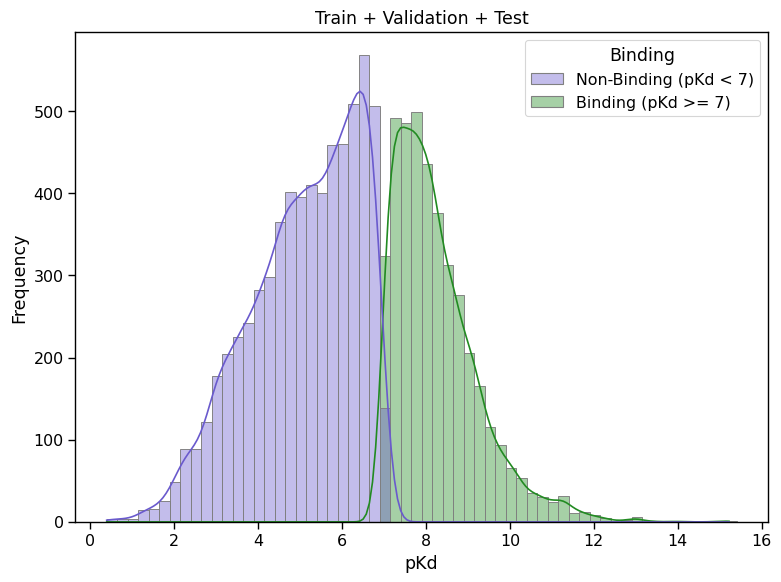

In [4]:
# Add a 'split' column to each DataFrame
train_data['split'] = 'train'
valid_data['split'] = 'valid'
test_data['split'] = 'test'

# Combine train, validation, and test datasets
combined_data = pd.concat([train_data, valid_data, test_data])

# Define Binding categories
combined_data['Binding'] = np.where(combined_data['Y'] >= 7, 'Binding (pKd >= 7)', 'Non-Binding (pKd < 7)')

# Define color palette
palette = {'Binding (pKd >= 7)': '#228B22', 'Non-Binding (pKd < 7)': '#6A5ACD'}

# Set context and font scale
sns.set_context("paper", font_scale=1.3)

# Plot all together
plt.figure(figsize=(8, 6))
sns.histplot(
    data=combined_data,
    x='Y',
    hue='Binding',
    kde=True,
    palette=palette,  
    binwidth=0.25,  
    alpha=0.4,     
    edgecolor='grey'
)
plt.xlabel('pKd')
plt.ylabel('Frequency')
plt.title('Train + Validation + Test')
plt.tight_layout()
plt.savefig('LeakyPDB_kde_combined.png', dpi=500)
plt.show()


### Function to map PDB IDs to UniProt IDs using PDBe API

In [8]:
import pandas as pd

# Define the function to get UniProt IDs
def fetch_uniprot_from_pdb(pdb_id):
    """
    Given a PDB ID, return the associated UniProt ID using PDBe API.
    """
    url = f"https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/{pdb_id}?pretty=true"
    try:
        # Call the API and get the response
        response = requests.get(url)
        response.raise_for_status()  # Ensure the request was successful
        json_results = response.json()

        # Extract UniProt IDs
        if pdb_id in json_results:
            uniprot_data = json_results[pdb_id].get('UniProt', {})
            if uniprot_data:
                # Return the first UniProt ID as a string without brackets
                return list(uniprot_data.keys())[0]
            else:
                return None  # No UniProt mapping found
        else:
            return None  # PDB ID not found in the response

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for PDB ID {pdb_id}: {e}")
        return None

# Load the full test set and extract all unique PDB IDs
test_set_data = pd.read_csv('test_set_leakypdb.csv')
unique_pdb_ids = test_set_data['PDB_ID'].unique()

# Fetch UniProt IDs for each PDB ID
pdb_to_uniprot = {pdb_id: fetch_uniprot_from_pdb(pdb_id) for pdb_id in unique_pdb_ids}

# Print the mapping to check the output (optional)
print(pdb_to_uniprot)

# Convert the pdb_to_uniprot dictionary into a DataFrame
pdb_uniprot_df = pd.DataFrame(list(pdb_to_uniprot.items()), columns=['PDB_ID', 'UniProt_ID'])

# Merge the UniProt_ID column with the test_set_data on the PDB_ID
merged_data = pd.merge(test_set_data, pdb_uniprot_df, on='PDB_ID', how='left')


merged_data.to_csv('test_set_with_uniprot.csv', index=False)



Error fetching data for PDB ID 4muf: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/4muf?pretty=true
Error fetching data for PDB ID 4mul: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/4mul?pretty=true
Error fetching data for PDB ID 1qyg: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/1qyg?pretty=true
Error fetching data for PDB ID 4fev: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/4fev?pretty=true
Error fetching data for PDB ID 4gkh: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/4gkh?pretty=true
Error fetching data for PDB ID 1q72: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/1q72?pretty=true
Error fetching data for PDB ID 4gki: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/pdbe/api/mappings/uniprot/4gki?pretty=true
Error fetching data for PDB

In [9]:
merged_data

,PDB_ID,header,Drug,category,Target,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,Y,covalent,UniProt_ID
0,6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,27/11/19,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False,P30405
1,3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,05/01/10,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False,P09960
2,5iwg,hydrolase,Nc1ccc(-c2ccc(F)cc2)cc1NC(=O)C1CCOCC1,refined,GKKKVCYYYDGDIGNYYYGQGHPMKPHRIRMTHNLLLNYGLYRKME...,1.66,31/08/16,hydrolase,test,True,True,True,False,Ki=0.346uM,6.46,False,Q92769
3,2xht,chaperone,CC(C)(C)c1cc(C(=O)N2CCOCC2)ccc1O,refined,MEEEEVETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALD...,2.27,01/09/10,chaperone,test,True,True,True,False,Kd=1.1uM,5.96,False,P07900
4,4fsl,hydrolase/inhibitor,COc1ccc(-c2nsc(C)c2C(=O)NC(=[NH2+])NCc2cc(C)c(...,refined,FVEMVDNLRGKSGQGYYVEMTVGSPPQTLNILVDTGSSNFAVGAAP...,2.50,10/10/12,hydrolase,test,True,True,True,False,Ki=20nM,7.70,False,P56817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,4w9x,transferase,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,general,VGVRVFAVGRHQVTLEESLAEGGFSTVFLVRTHGGIRCALKRMYVN...,2.14,10/09/14,transferase,test,True,True,False,False,Kd=39.8nM,7.40,False,Q9NSY1
2167,4q1d,transferase/transferase inhibitor,CCCc1sc(-c2ccc(OC)c(OCCF)c2)nc1[C@@H](C)Sc1nc(...,general,RIKKISIEGNIAAGKSTFVNILKQLSEDWEVVPEPVARWSNLTMEQ...,2.00,18/02/15,transferase,test,True,True,False,False,Ki=16.6nM,7.78,False,P27707
2168,5mnx,hydrolase,Nc1ccccn1,general,IVGGYTCGANTVPYQVSLNSGYHFCGGSLINSQWVVSAAHCYKSGI...,1.42,24/05/17,hydrolase,test,True,True,False,False,Kd=3.3mM,2.48,False,P00760
2169,5zah,hydrolase,COc1ncc(-c2nc(C(=O)NC(N)=[NH2+])c(N)nc2N2CCCCC...,general,IIGGEFTTIENQPWFAAIYRRHRGGSVTYVCGGSLISPCWVISATH...,2.98,19/12/18,hydrolase,test,True,True,False,False,Ki=53nM,7.28,False,P00749
